In [1]:
from modules.settings import global_mmf_settings as gset
from modules import evaluate_PICO_Y_M_scaling_reln as ymsr
from modules.settings import global_mmf_settings as gset
from cosmology import cosmo_fn
import multiprocessing as mp
from scipy.optimize import curve_fit
import bces.bces as bces
import time

%pylab notebook

def return_log_err(gauss_mean,gauss_err,num_samples=20000,ignore_negatives=True):
    logerr=np.zeros_like(gauss_mean)
    for idx, mu in enumerate(gauss_mean):
        x=np.random.normal(mu,gauss_err[idx],num_samples)
        if ignore_negatives:
            while np.any(x<0):
                neg_idx=np.where(x<0)[0]
                x[neg_idx]=np.random.normal(mu,gauss_err[idx],np.size(neg_idx))
        logerr[idx]=np.std(log10(x))
    return logerr

Populating the interactive namespace from numpy and matplotlib


# Initialize

In [2]:
#outpath="/nvme/arotti/mmf_dataout/pico_esz/"
outpath="../results/pico_esz/"
gset.setup_mmf_config(dataset="pico",outpath=outpath,xsize=10.,nside=4096,do_band_pass=False)
figpath=gset.mmfset.paths["result_figs"]
pmmf=ymsr.Y_M_scaling()
xsz_cat=pmmf.xsz_cat


def wrap_eval_Y500_xray_prior(idx):
    result=pmmf.eval_Y500_xray_prior(idx)
    return result

def parallel_eval_Y500_xray_prior(numprocs):
    pool=mp.Pool(processes=numprocs)
    result=pool.map(wrap_eval_Y500_xray_prior,pmmf.idx_list)
    pool.close()
    pool.join()
    return np.array(result)

def wrap_eval_Y500_blind(idx):
    result=pmmf.eval_Y500_blind(idx)
    return result

def parallel_eval_Y500_blind(numprocs):
    pool=mp.Pool(processes=numprocs)
    result=pool.map(wrap_eval_Y500_blind,pmmf.idx_list)
    pool.close()
    pool.join()
    return np.array(result)

In [4]:
clstr=pmmf.simulate_data(0)

<IPython.core.display.Javascript object>


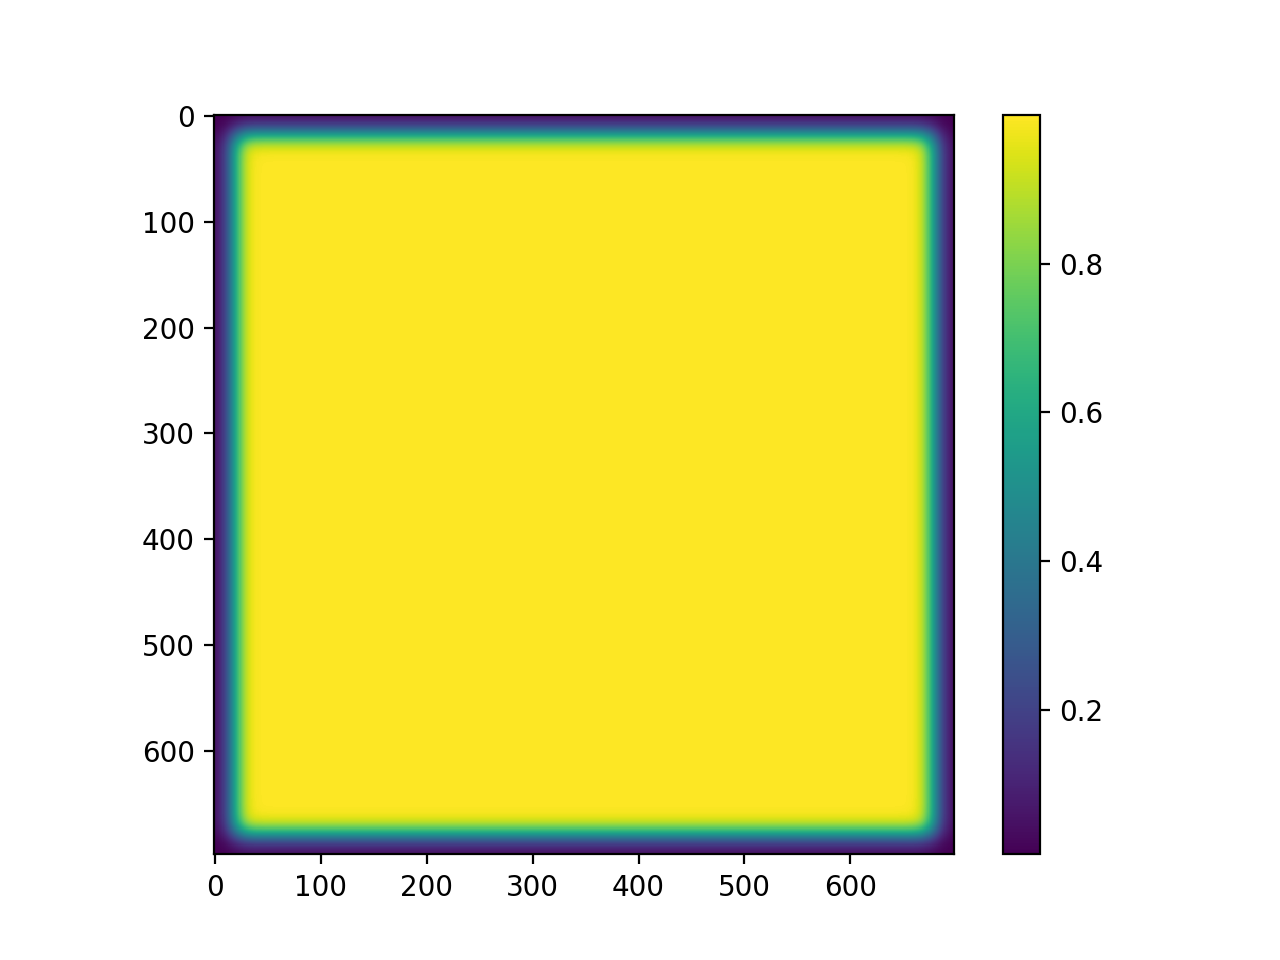

In [17]:
figure()
imshow(pmmf.emask)
colorbar()

# Preprocess pico simulations

In [4]:
gec.extract_tangent_planes()

{'pico_sims': '/mirror/arotti/simulations/PICO//CMB_PROBE_2017/',
 'planck_mmf3_cat': '/mirror/arotti/Planck//COM_PCCS_SZ-Catalogs_vPR2/',
 'reduced_pico_sims': '/mirror/arotti/simulations/PICO//reduced_data/',
 'result_data': '../results/pico_esz//results/10deg_patches//data/',
 'result_figs': '../results/pico_esz//results/10deg_patches//figs/',
 'templates': '../results/pico_esz//data/template_bank/10deg_patches/',
 'tplanes': '../results/pico_esz//data/tangent_planes/10deg_patches/'}

# MMF analysis with X-ray prior on location, size and temperature of cluster

In [4]:
start=time.time()
result=parallel_eval_Y500_xray_prior(8)
print time.time()-start

dtype=["idx","theta500","T500","YSZ_500","YSZ_500_err","YSZ_500_Tc","YSZ_500_err_Tc"]
fxsz_cat={}
for i, d in enumerate(dtype):
    fxsz_cat[d]=result[:,i]

{0.0: {21.0: -5.3900387785715367,
  25.0: -5.3642694818924967,
  30.0: -5.3258460929832481,
  36.0: -5.2707057467457963,
  43.0: -5.1940748159155374,
  52.0: -5.0764338914064036,
  62.0: -4.9211356472258645,
  75.0: -4.6819814069140326,
  90.0: -4.3563908519029138,
  110.0: -3.8458728767285151,
  130.0: -3.2569733800310954,
  155.0: -2.4258779746418226,
  185.0: -1.3143042683660144,
  225.0: 0.3134757691557773,
  270.0: 2.2793436331632444,
  320.0: 4.5637888341523931,
  385.0: 7.6152100004723495,
  460.0: 11.185951753913082,
  555.0: 15.734848896278667,
  665.0: 21.011502382531596,
  800.0: 27.49001598371115},
 0.10000000000000001: {21.0: -5.3881516215803709,
  25.0: -5.3623505948150969,
  30.0: -5.3238812125960449,
  36.0: -5.2686775982734613,
  43.0: -5.1919640359491988,
  52.0: -5.0742080462789136,
  62.0: -4.9187792589322958,
  75.0: -4.6794698736740115,
  90.0: -4.3537531070208981,
  110.0: -3.843219479169774,
  130.0: -3.254548792611041,
  155.0: -2.4241558038487301,
  185.0: -1.